In [246]:
from sklearn import datasets
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score
from rerf.urerf import UnsupervisedRandomForest
from sklearn import metrics
import seaborn as sns
import numpy as np

In [247]:
X, Y = make_blobs(n_samples=1000, random_state=170)
X1=X+np.random.normal(0, .3, size=X.shape)
#Y1 = Y+np.random.normal(0, .1, size=Y.shape)

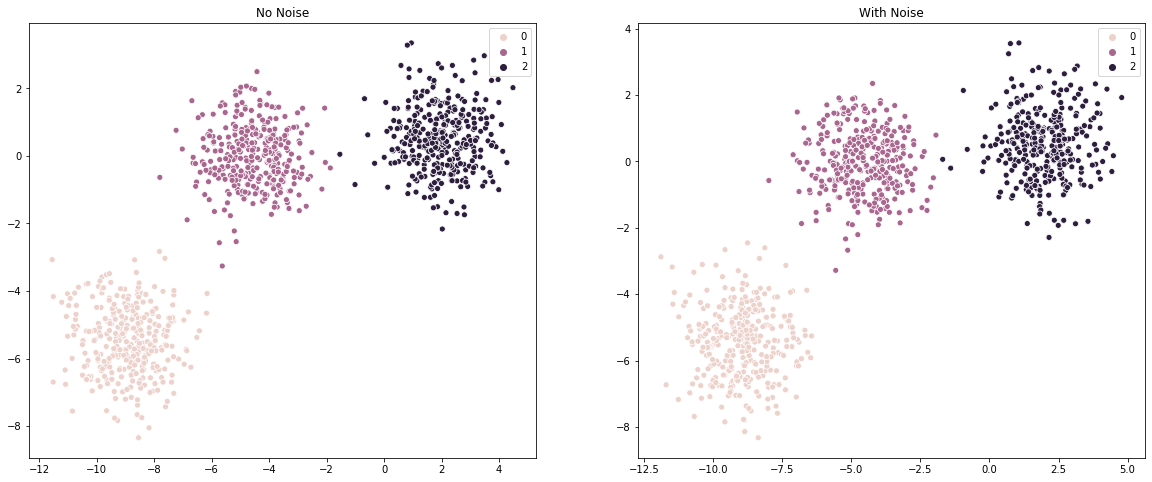

In [248]:
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=Y,ax=ax1);
ax1.set_title("No Noise");
sns.scatterplot(X1[:,0],X1[:,1],hue=Y,ax=ax2);
ax2.set_title("With Noise");

In [249]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)

In [250]:
clf.fit(X)
sim_mat = clf.transform()
#plt.imshow(sim_mat)

clf.fit(X1)
sim_mat1 = clf.transform()
#plt.imshow(sim_mat)

Text(0.5, 0, 'Number of Clusters')

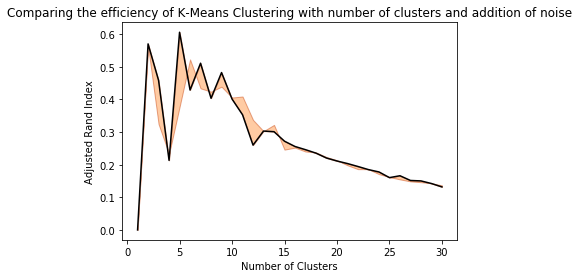

In [251]:
A_KMeans = []
A_KMeans1 = []
I = []
for i in range (1,31):
    I.append(i)
    cluster_K = KMeans(n_clusters=i)
    predict_labels_K = cluster_K.fit_predict(sim_mat)
    A_KMeans.append(adjusted_rand_score(Y, predict_labels_K))
for i in range (1,31):
    cluster_K1 = KMeans(n_clusters=i)
    predict_labels_K1 = cluster_K1.fit_predict(sim_mat1)
    A_KMeans1.append(adjusted_rand_score(Y, predict_labels_K1))

plt.plot(I,A_KMeans,'k-')
plt.fill_between(I,A_KMeans,A_KMeans1,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848');
plt.title('Comparing the efficiency of K-Means Clustering with number of clusters and addition of noise')
plt.ylabel('Adjusted Rand Index')
plt.xlabel('Number of Clusters')

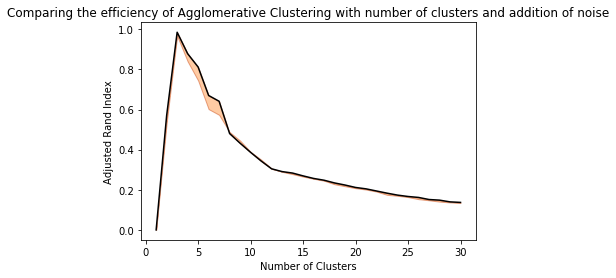

In [252]:
I=[]
A_Agglomerative1 = []
A_Agglomerative = []
for i in range (1,31):
    I.append(i)
    cluster_A = AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward")
    predict_labels_A = cluster_A.fit_predict(sim_mat)
    A_Agglomerative.append(adjusted_rand_score(Y, predict_labels_A))

for i in range (1,31):
    cluster_A1 = AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward")
    predict_labels_A1 = cluster_A1.fit_predict(sim_mat1)
    A_Agglomerative1.append(adjusted_rand_score(Y, predict_labels_A1))
    
plt.plot(I,A_Agglomerative,'k-')
plt.title('Comparing the efficiency of Agglomerative Clustering with number of clusters and addition of noise')
plt.ylabel('Adjusted Rand Index')
plt.xlabel('Number of Clusters')
plt.fill_between(I,A_Agglomerative,A_Agglomerative1,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spect

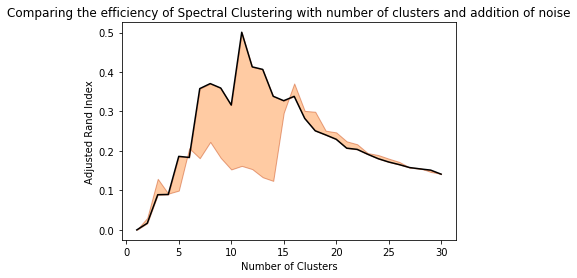

In [253]:
A_Spectral = []
A_Spectral1 = []
I=[]
for i in range (1,31):
    I.append(i)
    cluster_S=SpectralClustering(affinity='rbf', 
                                 assign_labels='discretize', 
                                 coef0=1,
                                 degree=3, 
                                 eigen_solver=None, 
                                 eigen_tol=0.0, 
                                 gamma=1.0,
                                 kernel_params=None, 
                                 n_clusters=i, 
                                 n_init=10, 
                                 n_jobs=None,
                                 n_neighbors=10, 
                                 random_state=0)
    predict_labels_S = cluster_S.fit_predict(sim_mat)
    A_Spectral.append(adjusted_rand_score(Y, predict_labels_S))

for i in range (1,31):
    cluster_S1=SpectralClustering(affinity='rbf', 
                                  assign_labels='discretize', 
                                  coef0=1,
                                  degree=3, 
                                  eigen_solver=None, 
                                  eigen_tol=0.0, 
                                  gamma=1.0,
                                  kernel_params=None, 
                                  n_clusters=i, 
                                  n_init=10, 
                                  n_jobs=None,
                                  n_neighbors=10, 
                                  random_state=0)
    predict_labels_S1 = cluster_S1.fit_predict(sim_mat1)
    A_Spectral1.append(adjusted_rand_score(Y, predict_labels_S1))
    
plt.plot(I,A_Spectral,'k-')
plt.title('Comparing the efficiency of Spectral Clustering with number of clusters and addition of noise')
plt.ylabel('Adjusted Rand Index')
plt.xlabel('Number of Clusters')
plt.fill_between(I,A_Spectral,A_Spectral1,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')